In [58]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from algbench import read_as_pandas, Benchmark

font = {'family': 'serif', 'size': 11}
matplotlib.rc('font', **font)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = [4.5, 3.5]

In [59]:
combo_results = read_as_pandas('results_combo', lambda row: {
    'algorithm': 'combo',
    'size': row['parameters']['args']['instance']['size'],
    'used_bits': (row['result']['avg_maximum_resident_size_kb']) * 8000,
})
qtg_results = read_as_pandas('results_qtg', lambda row: {
    'algorithm': 'qtg',
    'size': row['parameters']['args']['instance']['size'],
    'used_bits': np.average([measure['qubit_count'] for measure in row['result']['measurements']])
})

results = pd.concat([combo_results, qtg_results])

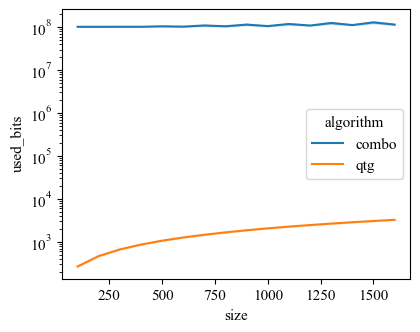

In [61]:
fig, ax = plt.subplots()
sns.lineplot(results[results['size'] > 30], x='size', y='used_bits', hue='algorithm', ax=ax)
ax.set_yscale('log')
plt.show()